<a href="https://colab.research.google.com/github/paras9o9/California-Housing-Price-Predictor/blob/main/notebooks/HousePricingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset loading and exploration

*   Loading the dataset into a Pandas DataFrame
*   Performing basic checks: .info(), .describe(), null values, data types
*   Ploting distributions of key features (price, area, rooms)
*   Creating pairplots and correlation heatmaps to explore relationships

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


(20640, 10)

In [ ]:
df.columns
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Histogram for numeric feature

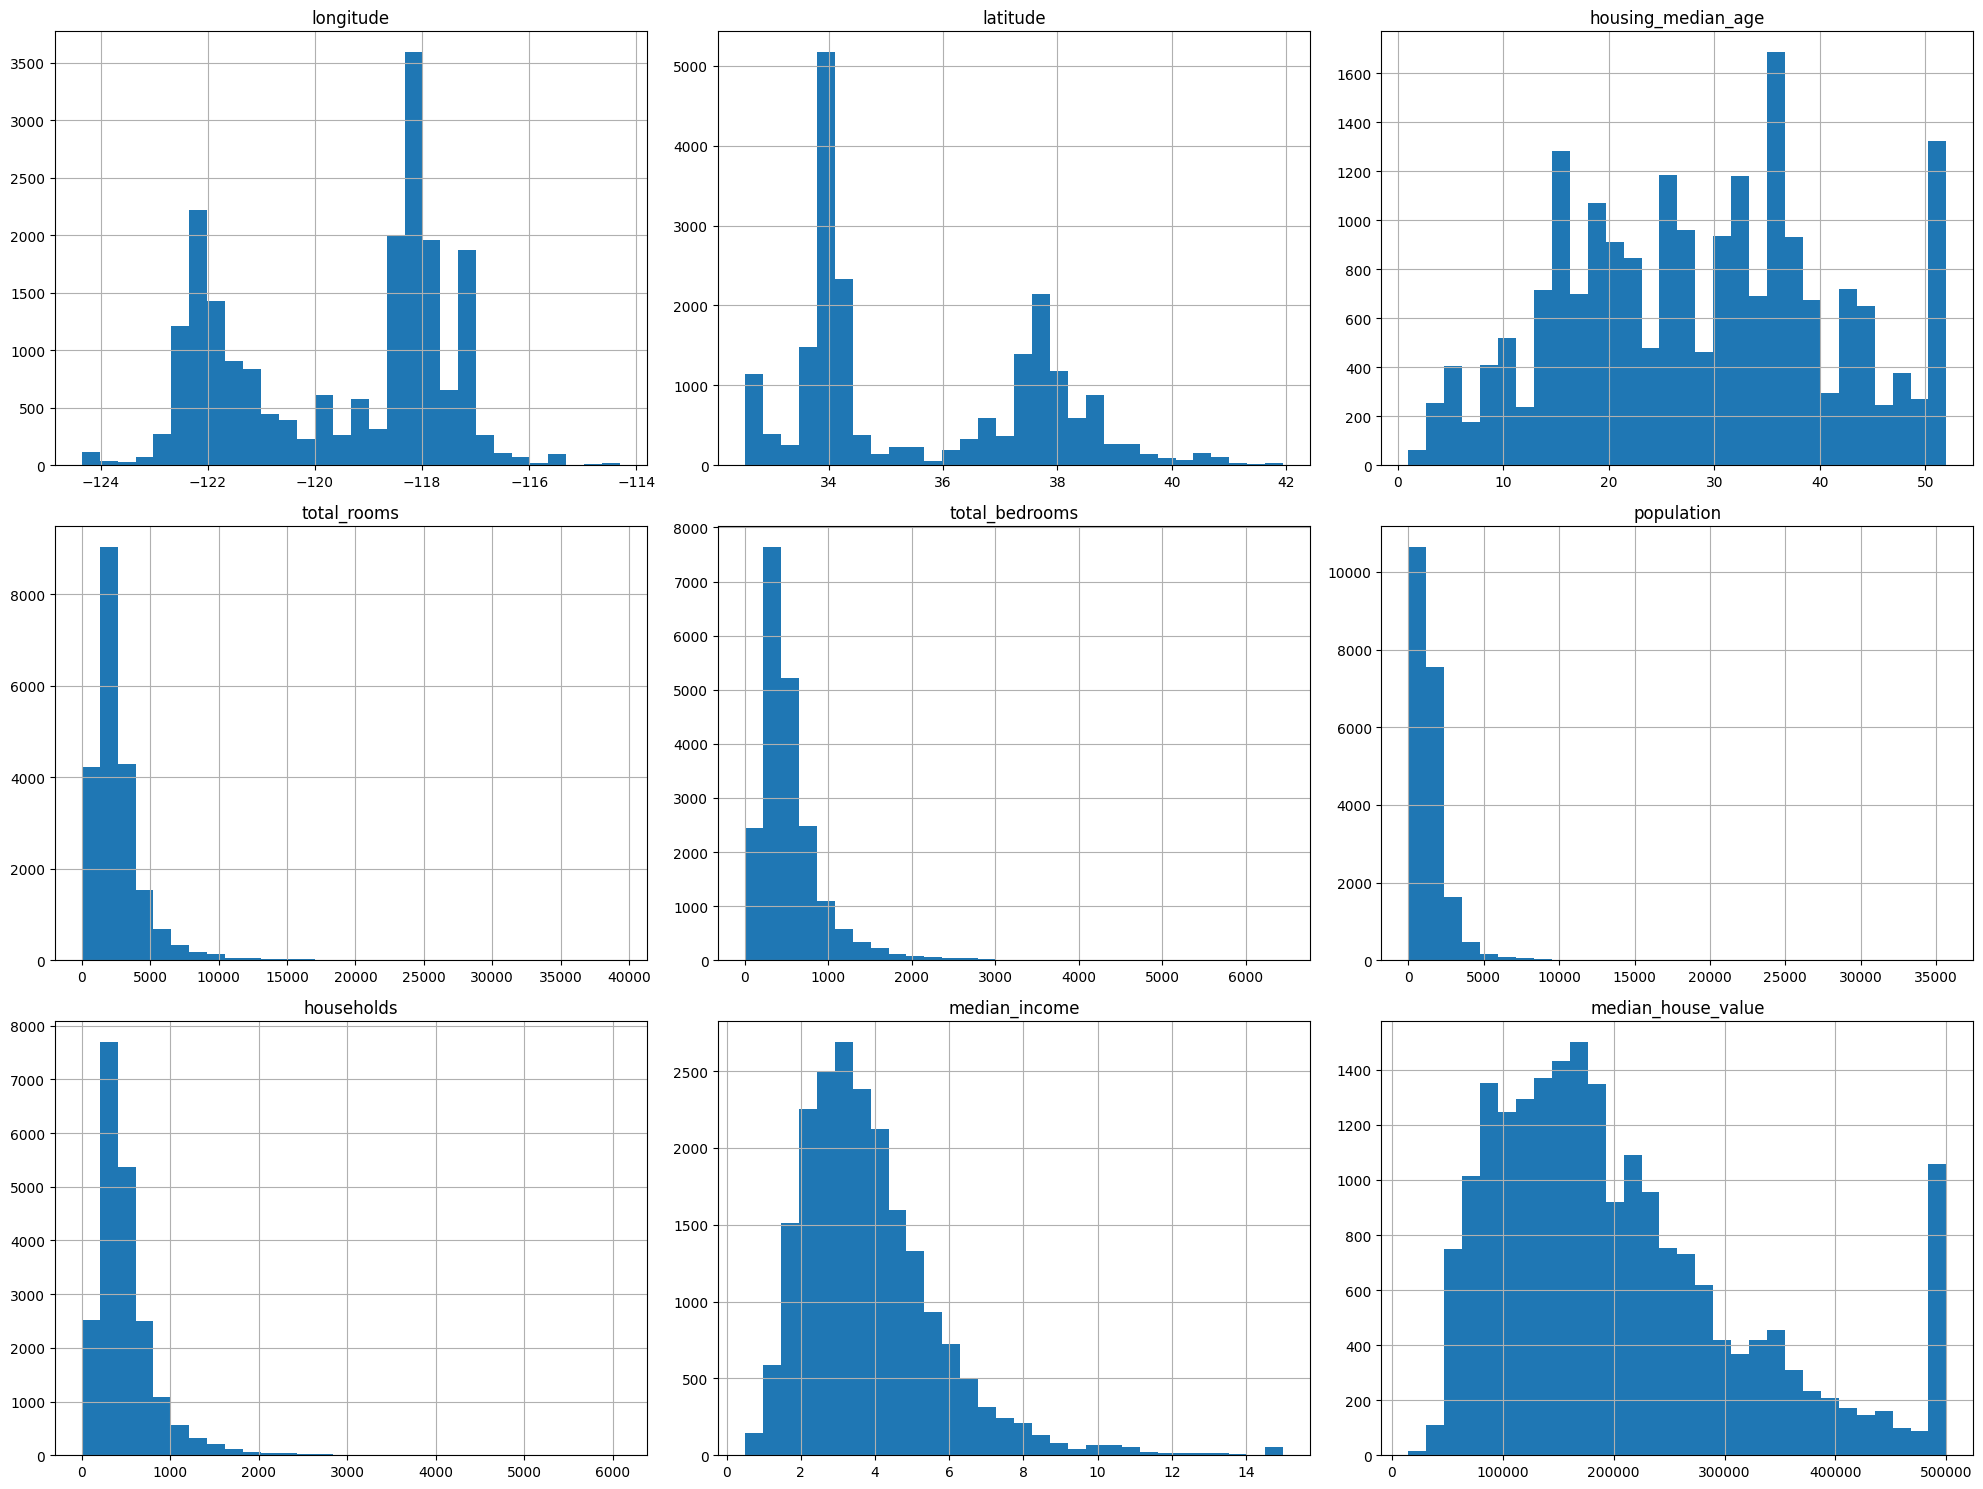

In [ ]:
df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Traget Variable distribution

<Axes: xlabel='median_house_value', ylabel='Count'>

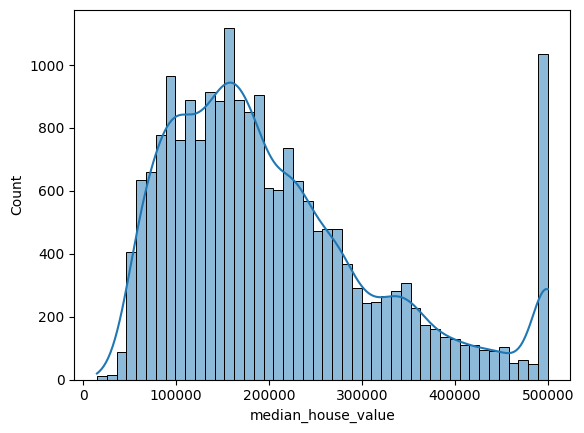

In [ ]:
sns.histplot(df['median_house_value'], kde=True)

# Boxplot for outliears

<Axes: ylabel='median_house_value'>

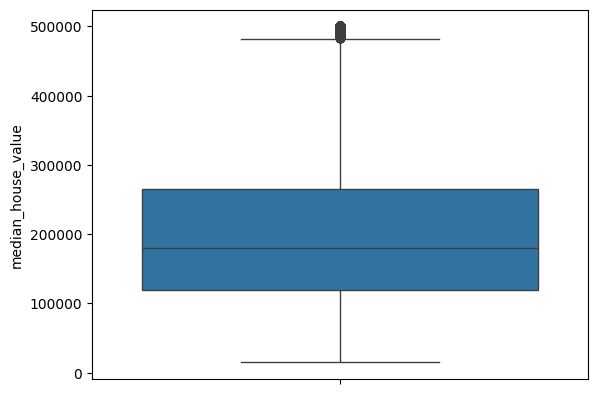

In [ ]:
sns.boxplot(df['median_house_value'])

# Relationship Analysis

<Axes: >

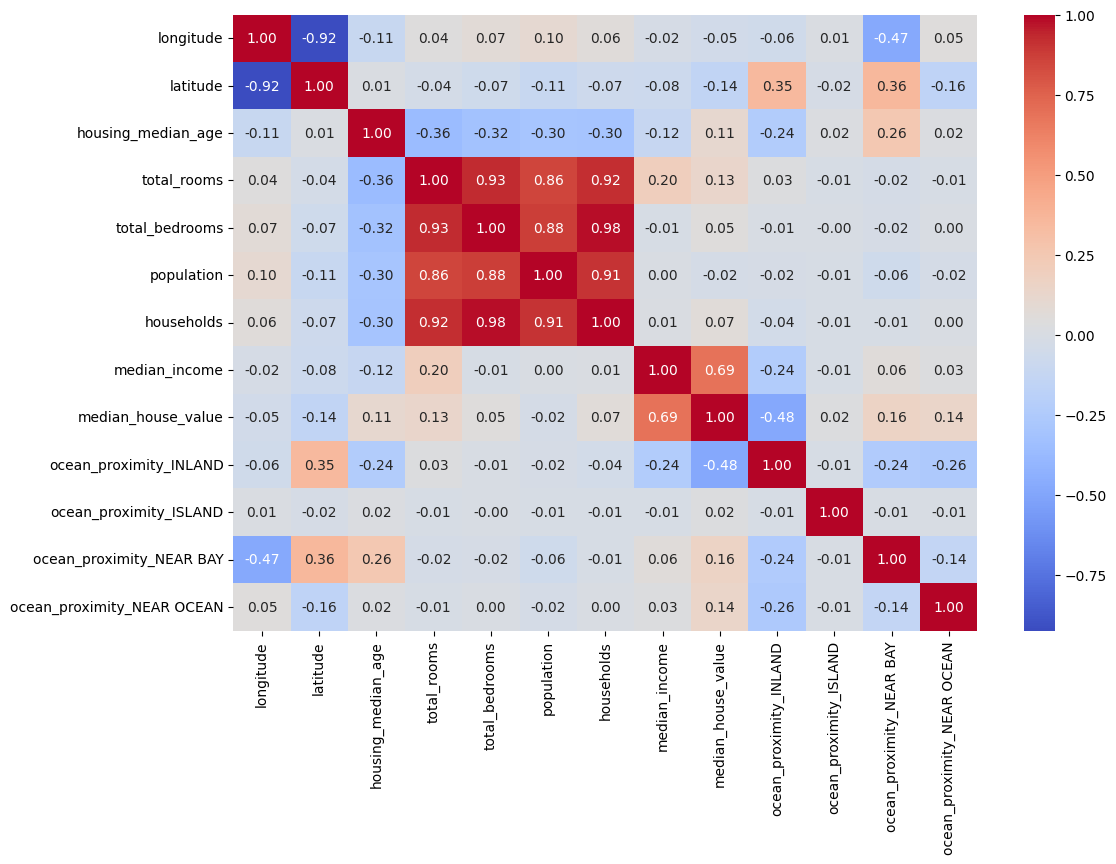

In [ ]:
# Convert 'ocean_proximity' to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

plt.figure(figsize=(12, 8))
# Calculate and plot the correlation matrix including the one-hot encoded columns
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')

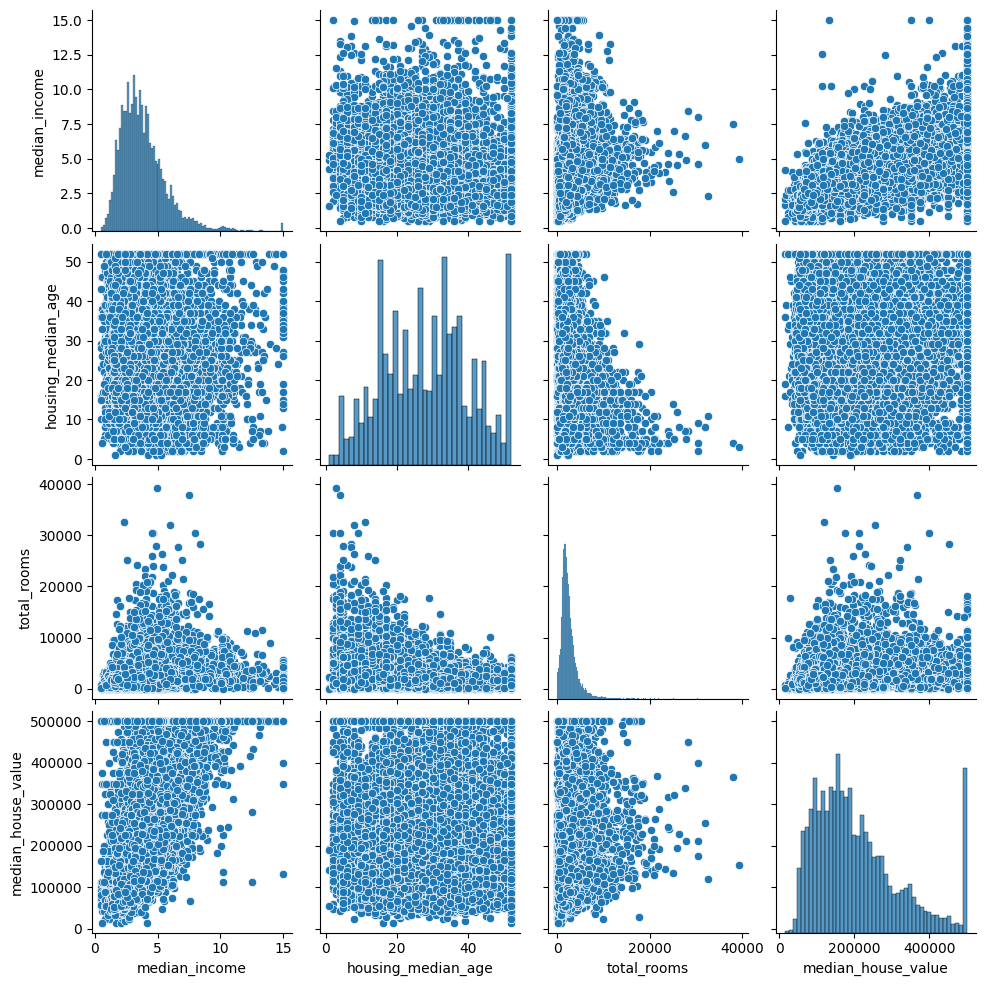

In [ ]:
selected_feature = [
    'median_income',
    'housing_median_age',
    'total_rooms',
    'median_house_value'
]
sns.pairplot(df[selected_feature])

# Data Processing

In [ ]:
# Log Transform Skewed Features
# Apply log1p (log(x + 1)) to skewed data
df['total_rooms'] = np.log1p(df['total_rooms'])
df['total_bedrooms'] = np.log1p(df['total_bedrooms'])
df['households'] = np.log1p(df['households'])
df['median_house_value'] = np.log1p(df['median_house_value'])
df['log_price'] = np.log1p(df['median_house_value'])

In [ ]:
# Feature Engeeniering
df['room_per_households'] = df['total_rooms'] / df['households']
df['bedroom_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_households'] = df['population'] / df['households']

df.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1, inplace=True)

<Axes: xlabel='median_income', ylabel='median_house_value'>

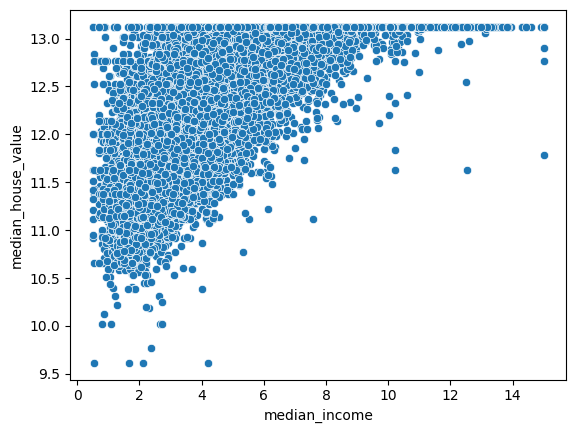

In [ ]:
sns.scatterplot(x='median_income', y='median_house_value', data=df)

In [ ]:
df = df[df['median_house_value'] < 500000]

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

numerical_col = [
    'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'median_income',
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household'
    ]

In [ ]:
# Split the Data
from sklearn.model_selection import train_test_split

# Handle Missing Values
from sklearn.impute import SimpleImputer

# Impute any remaining missing values
imputer = SimpleImputer(strategy='median')
df_imputed = imputer.fit_transform(df_encoded)

# Convert back to DataFrame (optional, but keeps column names)
df_imputed = pd.DataFrame(df_imputed, columns=df_encoded.columns)

# Split Featuers and Target
x = df_imputed.drop('median_house_value', axis=1)
y = df_imputed['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Training set
print(f"Training MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Training R2: {r2_score(y_train, y_train_pred)}")

# Test set
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Test R2: {r2_score(y_test, y_test_pred)}")


Training MSE: 4672164815.221733
Training R2: 0.6490581063776201
Test MSE: 5243515214.007597
Test R2: 0.6068177547067315


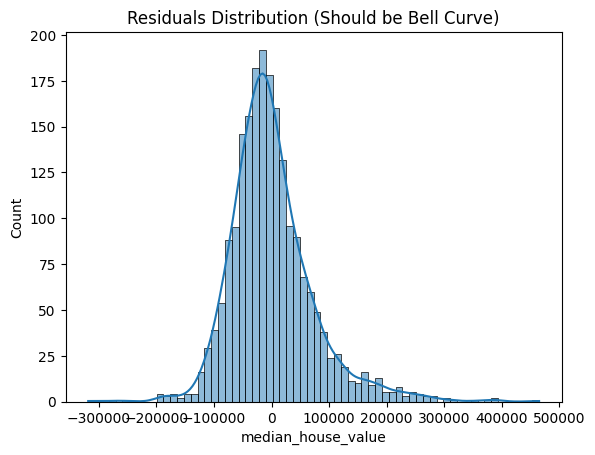

In [ ]:
residuals = y_test - y_test_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution (Should be Bell Curve)")
plt.show()

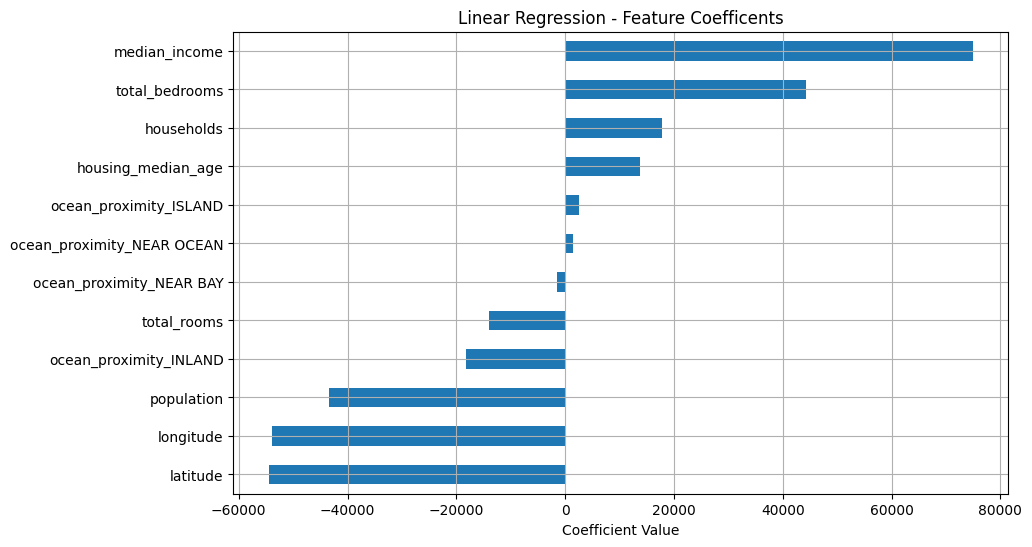

In [ ]:
# View Coefficients
coeffs = pd.Series(lin_reg.coef_, index=x.columns)

# Sort and plot
coeffs_sorted = coeffs.sort_values()

# Plot
plt.figure(figsize=(10, 6))
coeffs_sorted.plot(kind='barh')
plt.title('Linear Regression - Feature Coefficents')
plt.xlabel('Coefficient Value')
plt.grid(True)
plt.show()

# Lasso Regression Model

In [ ]:
from sklearn.linear_model import LassoCV

# Choosing best alpha
lasso_cv = LassoCV(alphas=[0.01, 0.05, 0.1, 0.5, 1.0], cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

print(f"Best alpha: {lasso_cv.alpha_}")

Best alpha: 1.0


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Initializing Lasso model with alpha
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train)

# Prediction
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Evaluate
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Training R2: {train_r2}")
print(f"Test MSE: {test_mse}")
print(f"Test R2: {test_r2}")

Training MSE: 4672164815.233166
Training R2: 0.6490581063767613
Test MSE: 5243512913.893091
Test R2: 0.6068179271796145


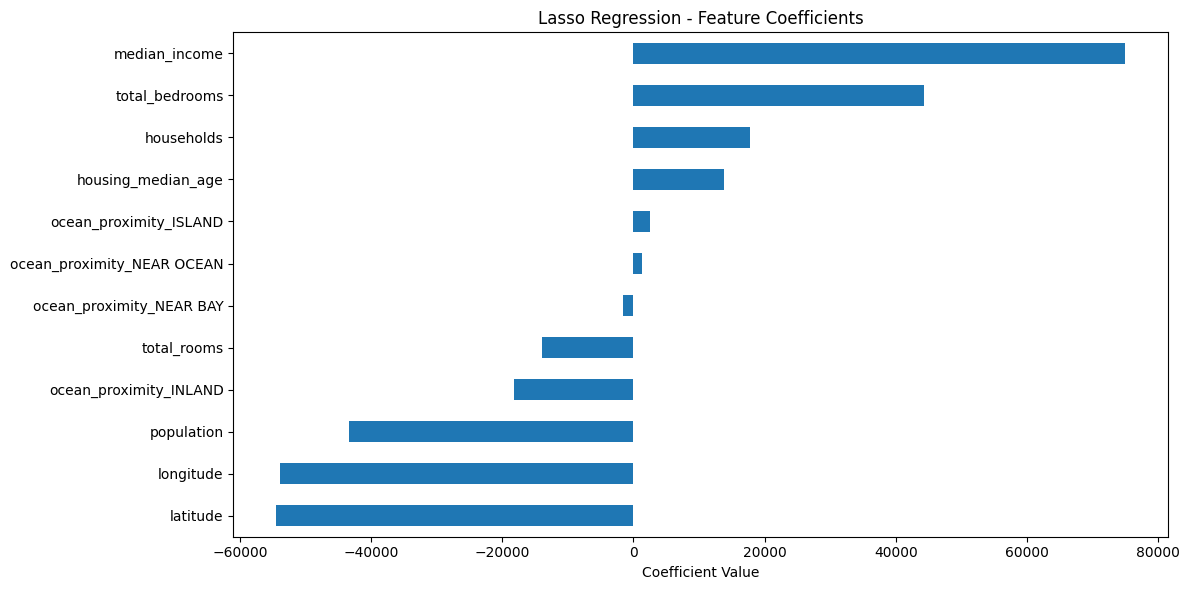

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature names and coefficinets
coef = pd.Series(lasso.coef_, index=x.columns)

# Sort by absolute value for clearer visualization
coef_sorted = coef.sort_values()

# Plot
plt.figure(figsize=(12, 6))
coef_sorted.plot(kind='barh')
plt.title('Lasso Regression - Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Radnom Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model with defualt parameters (or tune later)
rf_model = RandomForestRegressor(random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Prediction
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f"Training MSE: {train_mse_rf}")
print(f"Training R2: {train_r2_rf}")
print(f"Test MSE: {test_mse_rf}")
print(f"Test R2: {test_r2_rf}")

Training MSE: 324194975.3023296
Training R2: 0.9756486333348536
Test MSE: 2507144544.3662257
Test R2: 0.8120030778979537


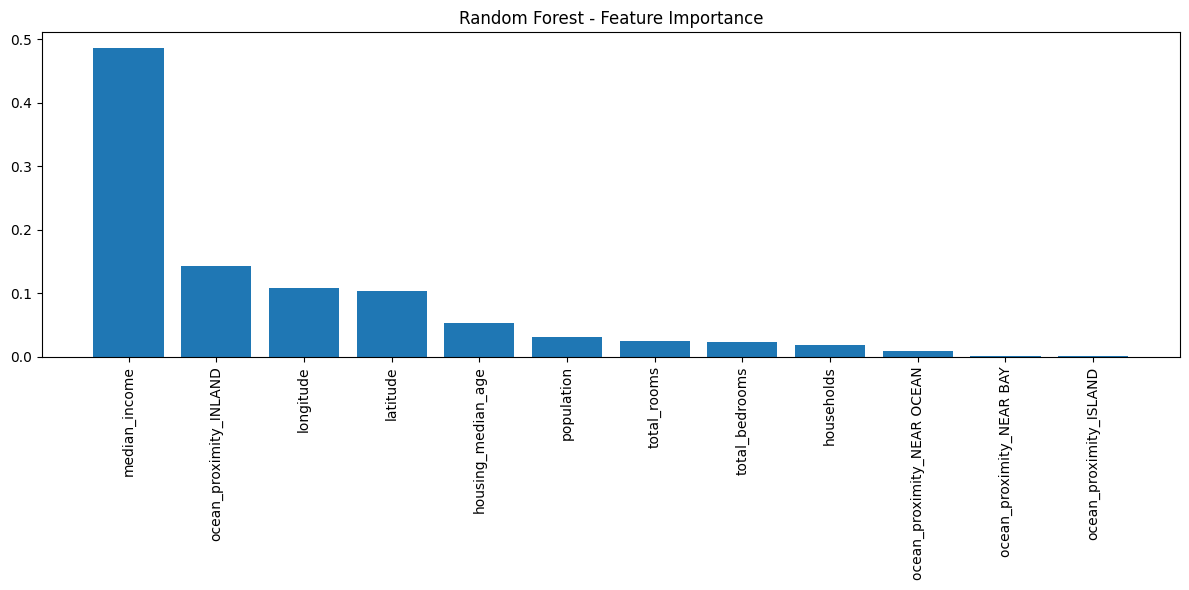

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get Importances
importances = rf_model.feature_importances_
feature_names = x.columns

# Sort by Importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title('Random Forest - Feature Importance')
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Randomized Search
rf_search = RandomizedSearchCV(
    estimator = RandomForestRegressor(random_state=42),
    param_distributions = param_dist,
    n_iter=20, cv=3, n_jobs=-1, random_state=42, verbose=1
)

rf_search.fit(X_train, y_train)
print("Best Parameters:", rf_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


# Random Forest Model with Tuned Hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model with the best parameters from Randomized Search
rf_tuned_model = RandomForestRegressor(**rf_search.best_params_, random_state=42)

# Training the model
rf_tuned_model.fit(X_train, y_train)

# Prediction
y_train_pred_rf_tuned = rf_tuned_model.predict(X_train)
y_test_pred_rf_tuned = rf_tuned_model.predict(X_test)

# Evaluate
train_mse_rf_tuned = mean_squared_error(y_train, y_train_pred_rf_tuned)
train_r2_rf_tuned = r2_score(y_train, y_train_pred_rf_tuned)
test_mse_rf_tuned = mean_squared_error(y_test, y_test_pred_rf_tuned)
test_r2_rf_tuned = r2_score(y_test, y_test_pred_rf_tuned)

print(f"Tuned Training MSE: {train_mse_rf_tuned}")
print(f"Tuned Training R2: {train_r2_rf_tuned}")
print(f"Tuned Test MSE: {test_mse_rf_tuned}")
print(f"Tuned Test R2: {test_r2_rf_tuned}")

Tuned Training MSE: 338742444.1019577
Tuned Training R2: 0.9745559243980196
Tuned Test MSE: 2546051699.4420285
Tuned Test R2: 0.8090856452280129


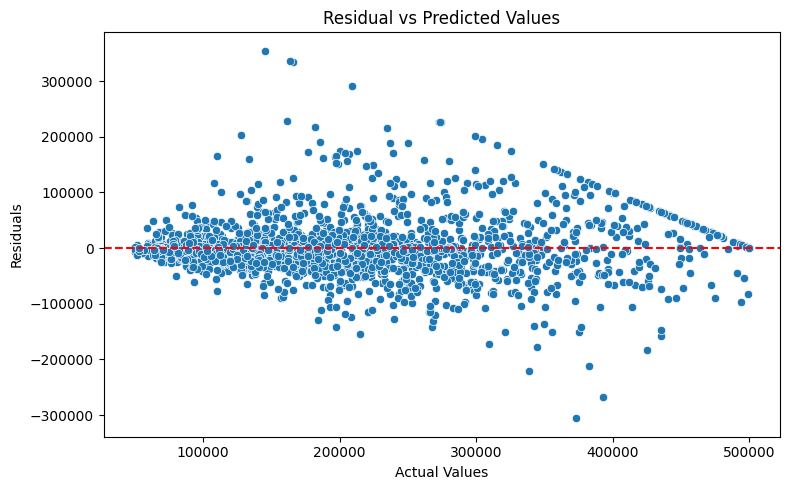

In [ ]:
import seaborn as sns

# Residuals
residuals = y_test - y_test_pred_rf

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred_rf, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_tuned_model, 'random_forest_model.pkl')

# Later load it like this:
# loaded_model = joblib.load('random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
# from google.colab import files
# files.download('random_forest_model.pkl')